# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# model building libraries

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import Data

In [2]:
df = pd.read_csv('Real estate.csv')

# Data Overview

In [3]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Without any Null or Missing data

# EDA

In [5]:
df.drop('No', axis = 1, inplace = True)

In [6]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


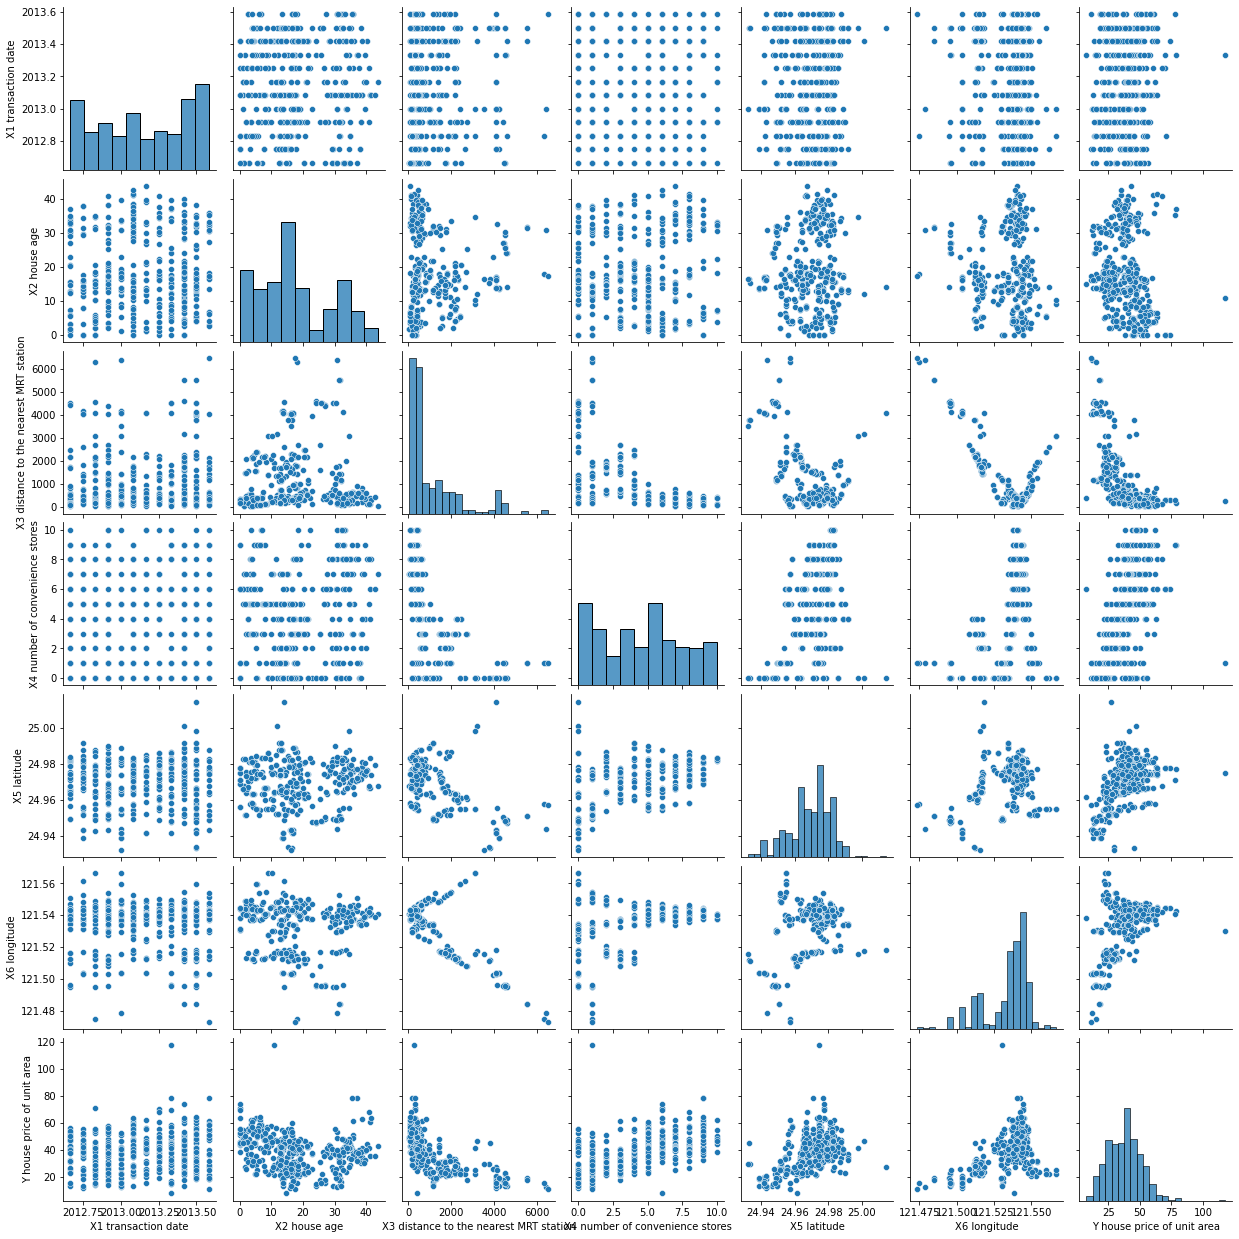

In [7]:
sns.pairplot(df)

# Determine the Features and Label

In [8]:
X = df.drop(['Y house price of unit area'], axis = 1)
y = df['Y house price of unit area']

# Preprocessing & Adjusting Model Parameters

In [9]:
train_RMSE_List = []
test_RMSE_List = []

for i in range(1,10):
    
    #preprocessing
    
    polynomial_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    #split
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #train the model
    
    polymodel = LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #predicting on both train and test data
    
    y_train_pred = polymodel.predict(X_train)
    y_test_pred = polymodel.predict(X_test)
    
    #evaluation
    
    train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #append
    
    train_RMSE_List.append(train_RMSE)
    test_RMSE_List.append(test_RMSE)

In [10]:
train_RMSE_List

[9.543254404458171,
 8.160754051707615,
 7.258591308862638,
 6.174237037845353,
 7.15145819264801,
 6.760464140470179,
 5.354984063141973,
 5.029403726866625,
 6.061798263930677]

In [11]:
test_RMSE_List

[6.797925995105753,
 5.386881091888491,
 12.273657707607962,
 73.58280681302509,
 843.8213426518597,
 1625.4394423983642,
 40465.06051067101,
 18862.061767499297,
 137739.91143630043]

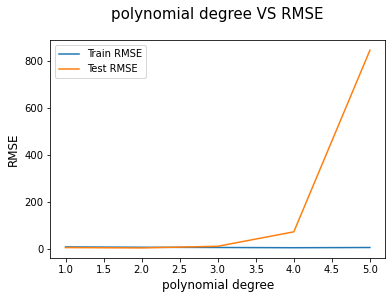

In [12]:
plt.plot(range(1,6), train_RMSE_List[:5], label = 'Train RMSE')
plt.plot(range(1,6), test_RMSE_List[:5], label = 'Test RMSE')

plt.title('polynomial degree VS RMSE', fontsize = 15, y=1.07)
plt.xlabel('polynomial degree', fontsize = 12)
plt.ylabel('RMSE', fontsize = 12)

plt.legend()

Now we figured out that 2 is the best degree for our polynomial model

# Final Model

In [13]:
final_polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
final_poly_features = final_polynomial_converter.fit_transform(X)

In [14]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)

In [15]:
final_polymodel = LinearRegression()
final_polymodel.fit(X_trainf, y_trainf)

LinearRegression()

In [16]:
y_predf = final_polymodel.predict(X_testf)

In [17]:
RMSE = np.sqrt(metrics.mean_squared_error(y_testf, y_predf))

RMSE

5.386881091888491

In [18]:
y.mean()

37.98019323671498

In [19]:
final_polymodel.score(X_testf,y_testf)

0.7807879178094681

# Residuals

In [20]:
test_residuals = y_testf - y_predf

In [21]:
pd.DataFrame({'Y_testf':y_testf, 'Y_predf':y_predf, 'Residuals':test_residuals}).head()

,Y_testf,Y_predf,Residuals
176,19.2,16.594178,2.605822
347,11.2,5.042934,6.157066
307,24.7,19.515324,5.184676
299,46.1,47.185179,-1.085179
391,31.3,29.850698,1.449302


Text(0, 0.5, 'final predicted house price')

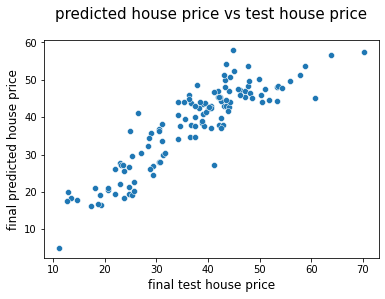

In [22]:
sns.scatterplot(x = y_testf, y = y_predf)

plt.title('predicted house price vs test house price', fontsize = 15, y=1.07)
plt.xlabel('final test house price', fontsize = 12)
plt.ylabel('final predicted house price', fontsize = 12)

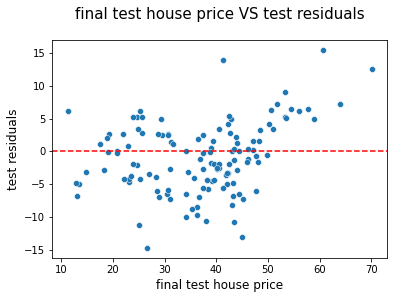

In [23]:
sns.scatterplot(x = y_testf, y=test_residuals)

plt.title('final test house price VS test residuals', fontsize = 15, y=1.07)
plt.xlabel('final test house price', fontsize = 12)
plt.ylabel('test residuals', fontsize = 12)
plt.axhline(y=0, color='r', ls = '--')


Text(0.42499999999999716, 0.5, 'count')

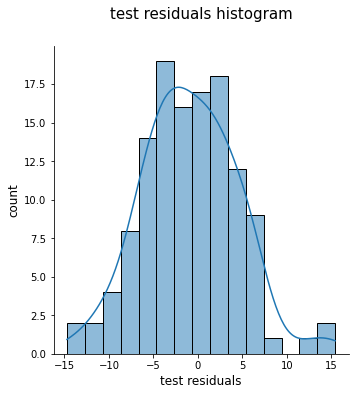

In [24]:
sns.displot(test_residuals, bins = 15, kde= True)

plt.title('test residuals histogram', fontsize = 15, y=1.07)
plt.xlabel('test residuals', fontsize = 12)
plt.ylabel('count', fontsize = 12)